In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the preprocessed dataset (replace the path with your actual file path)
data = pd.read_csv('../data/norm_data.csv')

# Define features (X) and target (y)
X = data.copy()
y = X.pop('label')

# Remove the 'url' column as it is not a feature
X.pop('url')

# Split the dataset into training and test sets (using only 25% of the data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the models
log_reg = LogisticRegression(max_iter=1000)  # Increased max_iter
tree_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
svm_clf = SVC()

# Analysis of logisitc regression

## Default Model:  
- Trains a Logistic Regression model with default settings.
- Evaluates the model on the test data.

## Tuned Model:  

- Uses GridSearchCV to find the best settings (hyperparameters) for the Logistic Regression model.
- Trains the model with these best settings.
- Evaluates the tuned model on the test data.

## Cross-Validation:  

- Checks the average performance of both the default and tuned models using cross-validation (splitting the data into 5 parts and training/testing on each part).

## Results:  


### Default Model:  
- Accuracy: 0.999978 

### Tuned Model:  
- Accuracy: 0.999990 (slightly better than default)

### Cross-Validation:  
- Default model average accuracy: 0.999941
- Tuned model average accuracy: 0.999975
- Both models perform extremely well, with the tuned model being slightly better.

Default Logistic Regression Accuracy:  0.9999615998771196
Default Logistic Regression Report:
               precision    recall  f1-score   support

  legitimate       1.00      1.00      1.00    937118
    phishing       1.00      1.00      1.00    937876

    accuracy                           1.00   1874994
   macro avg       1.00      1.00      1.00   1874994
weighted avg       1.00      1.00      1.00   1874994



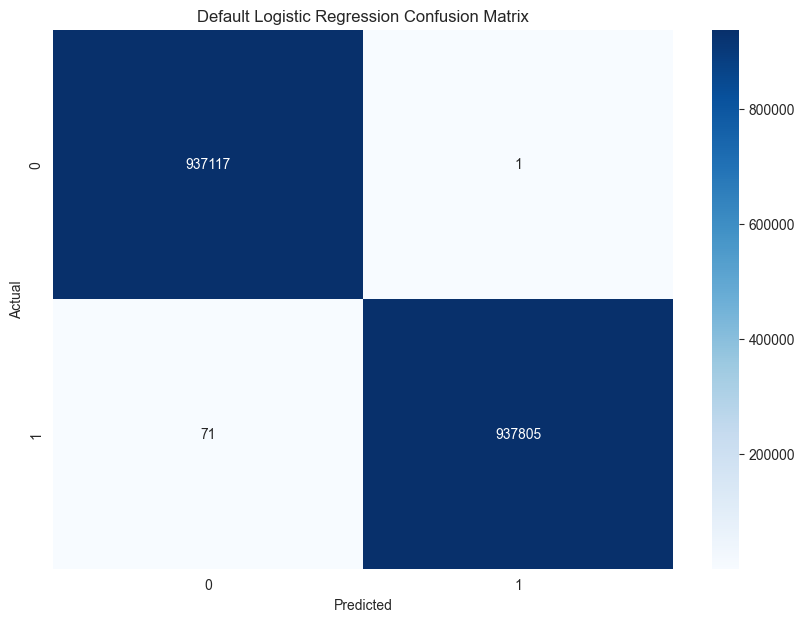

Tuned Logistic Regression Accuracy:  0.9999738665830398
Tuned Logistic Regression Report:
               precision    recall  f1-score   support

  legitimate       1.00      1.00      1.00    937118
    phishing       1.00      1.00      1.00    937876

    accuracy                           1.00   1874994
   macro avg       1.00      1.00      1.00   1874994
weighted avg       1.00      1.00      1.00   1874994



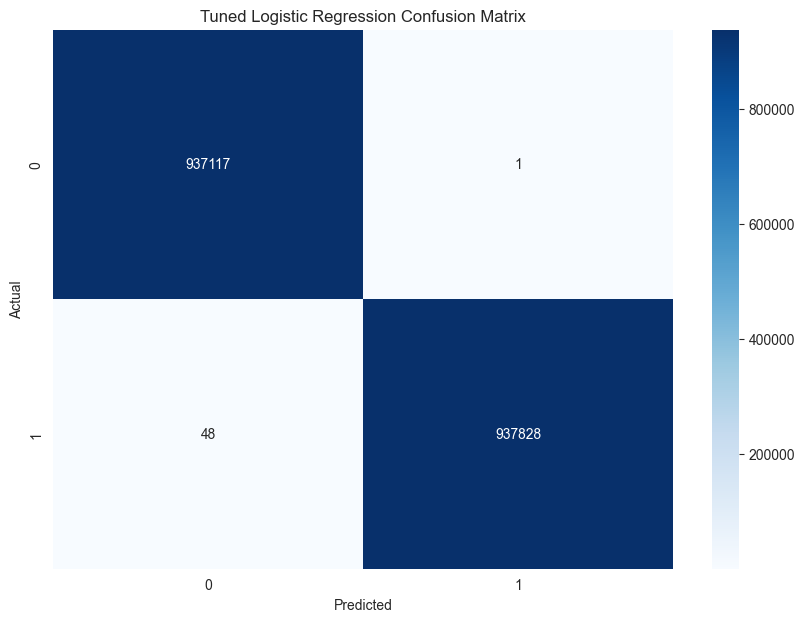

Default Logistic Regression Cross-Validation Accuracy:  0.9999503998207986
Tuned Logistic Regression Cross-Validation Accuracy:  0.9999759999103993


In [5]:


# Train the Logistic Regression model with default parameters
default_log_reg = LogisticRegression(max_iter=1000)
default_log_reg.fit(X_train, y_train)

# Evaluate the default model
default_log_reg_pred = default_log_reg.predict(X_test)
print("Default Logistic Regression Accuracy: ", accuracy_score(y_test, default_log_reg_pred))
print("Default Logistic Regression Report:\n", classification_report(y_test, default_log_reg_pred))

# Confusion matrix for default model
default_cm = confusion_matrix(y_test, default_log_reg_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(default_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Default Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Perform GridSearchCV for hyperparameter tuning with parallelization
param_grid_log_reg = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}
grid_log_reg = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_log_reg, cv=5, scoring='accuracy', n_jobs=-1)
grid_log_reg.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_log_reg = grid_log_reg.best_estimator_

# Evaluate the best model
log_reg_pred = best_log_reg.predict(X_test)
print("Tuned Logistic Regression Accuracy: ", accuracy_score(y_test, log_reg_pred))
print("Tuned Logistic Regression Report:\n", classification_report(y_test, log_reg_pred))

# Confusion matrix for tuned model
tuned_cm = confusion_matrix(y_test, log_reg_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(tuned_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Tuned Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Perform cross-validation on the default model
default_scores = cross_val_score(default_log_reg, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print("Default Logistic Regression Cross-Validation Accuracy: ", default_scores.mean())

# Perform cross-validation on the tuned model
tuned_scores = cross_val_score(best_log_reg, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print("Tuned Logistic Regression Cross-Validation Accuracy: ", tuned_scores.mean())

# Analysis of Decision Tree

## Default Model:

- Trains a Decision Tree model with default settings.
- Evaluates the model on the test data.

## Tuned Model:

- Uses GridSearchCV to find the best settings (hyperparameters) for the Decision Tree model.
- Trains the model with these best settings.
- Evaluates the tuned model on the test data.

## Cross-Validation:
- Checks the average performance of both the default and tuned models using cross-validation (splitting the data into 5 parts and training/testing on each part).

## Results:
Default Model:
- Accuracy: 0.999972
-  Detailed report shows precision, recall, and F1-score all close to 1.00 for both classes (0 and 1)

Tuned Model:
- Accuracy: 0.999972 (same as default)
- Detailed report shows precision, recall, and F1-score all close to 1.00 for both classes (0 and 1)

Cross-Validation:
- Default model average accuracy: 0.999985
- Tuned model average accuracy: 0.999986

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train the Decision Tree model with default parameters
default_tree_clf = DecisionTreeClassifier()
default_tree_clf.fit(X_train, y_train)

# Evaluate the default model
default_tree_clf_pred = default_tree_clf.predict(X_test)
print("Default Decision Tree Accuracy: ", accuracy_score(y_test, default_tree_clf_pred))
print("Default Decision Tree Report:\n", classification_report(y_test, default_tree_clf_pred))

# Confusion matrix for default model
default_cm = confusion_matrix(y_test, default_tree_clf_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(default_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Default Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Hyperparameter tuning for Decision Tree
param_grid_tree_clf = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_tree_clf = GridSearchCV(DecisionTreeClassifier(), param_grid_tree_clf, cv=5, scoring='accuracy', n_jobs=-1)
grid_tree_clf.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_tree_clf = grid_tree_clf.best_estimator_

# Evaluate the best model
tree_clf_pred = best_tree_clf.predict(X_test)
print("Tuned Decision Tree Accuracy: ", accuracy_score(y_test, tree_clf_pred))
print("Tuned Decision Tree Report:\n", classification_report(y_test, tree_clf_pred))

# Confusion matrix for tuned model
tuned_cm = confusion_matrix(y_test, tree_clf_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(tuned_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Tuned Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Perform cross-validation on the default model
default_tree_scores = cross_val_score(default_tree_clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print("Default Decision Tree Cross-Validation Accuracy: ", default_tree_scores.mean())

# Perform cross-validation on the tuned model
tuned_tree_scores = cross_val_score(best_tree_clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print("Tuned Decision Tree Cross-Validation Accuracy: ", tuned_tree_scores.mean())

Default Decision Tree Accuracy:  0.9999685332326397
Default Decision Tree Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    937118
           1       1.00      1.00      1.00    937876

    accuracy                           1.00   1874994
   macro avg       1.00      1.00      1.00   1874994
weighted avg       1.00      1.00      1.00   1874994

Tuned Decision Tree Accuracy:  0.9999722665779197
Tuned Decision Tree Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    937118
           1       1.00      1.00      1.00    937876

    accuracy                           1.00   1874994
   macro avg       1.00      1.00      1.00   1874994
weighted avg       1.00      1.00      1.00   1874994

Default Decision Tree Cross-Validation Accuracy:  0.9999567997823983
Tuned Decision Tree Cross-Validation Accuracy:  0.9999679998463987


# Analysis of Random Forest
### Default Model:
- Trains a Random Forest model with default settings.
- Evaluates the model on the test data.

### Tuned Model:
- Uses GridSearchCV to find the best settings (hyperparameters) for the Random Forest model.
- Trains the model with these best settings.
- Evaluates the tuned model on the test data.
### Cross-Validation:
- Checks the average performance of both the default and tuned models using cross-validation (splitting the data into 3 parts and training/testing on each part).
## Results:

### Default Model:
- Accuracy: 0.999991

### Tuned Model:
- Accuracy: 0.999992 (slightly better than default)


In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train the Random Forest model with default parameters
default_rf_clf = RandomForestClassifier()
default_rf_clf.fit(X_train, y_train)

# Evaluate the default model
default_rf_clf_pred = default_rf_clf.predict(X_test)
print("Default Random Forest Accuracy: ", accuracy_score(y_test, default_rf_clf_pred))
print("Default Random Forest Report:\n", classification_report(y_test, default_rf_clf_pred))

# Confusion matrix for default model
default_cm = confusion_matrix(y_test, default_rf_clf_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(default_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Default Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Hyperparameter tuning for Random Forest
param_grid_rf_clf = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid_rf_clf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf_clf.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_rf_clf = grid_rf_clf.best_estimator_

# Evaluate the best model
rf_clf_pred = best_rf_clf.predict(X_test)
print("Tuned Random Forest Accuracy: ", accuracy_score(y_test, rf_clf_pred))
print("Tuned Random Forest Report:\n", classification_report(y_test, rf_clf_pred))

# Confusion matrix for tuned model
tuned_cm = confusion_matrix(y_test, rf_clf_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(tuned_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Tuned Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Perform cross-validation on the default model
default_rf_scores = cross_val_score(default_rf_clf, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)
print("Default Random Forest Cross-Validation Accuracy: ", default_rf_scores.mean())

# Perform cross-validation on the tuned model
tuned_rf_scores = cross_val_score(best_rf_clf, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)
print("Tuned Random Forest Cross-Validation Accuracy: ", tuned_rf_scores.mean())

Default Random Forest Accuracy:  0.9999909333043199
Default Random Forest Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    937118
           1       1.00      1.00      1.00    937876

    accuracy                           1.00   1874994
   macro avg       1.00      1.00      1.00   1874994
weighted avg       1.00      1.00      1.00   1874994

Tuned Random Forest Accuracy:  0.9999919999743999
Tuned Random Forest Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    937118
           1       1.00      1.00      1.00    937876

    accuracy                           1.00   1874994
   macro avg       1.00      1.00      1.00   1874994
weighted avg       1.00      1.00      1.00   1874994

Default Random Forest Cross-Validation Accuracy:  0.9999935999667198
Tuned Random Forest Cross-Validation Accuracy:  0.9999935999743998


# Analysis of SVM
### Default Model:
- Trains an SVM model with default settings.
- Evaluates the model on the test data.
### Tuned Model:
- Uses GridSearchCV to find the best settings (hyperparameters) for the SVM model.
- Trains the model with these best settings.
= Evaluates the tuned model on the test data.
### Cross-Validation:
- Checks the average performance of both the default and tuned models using cross-validation (splitting the data into 3 parts and training/testing on each part).

## Results:

### Default Model:  
- Accuracy: 0.999976
- Detailed report shows precision, recall, and F1-score all close to 1.00 for both classes (0 and 1)
### Tuned Model:  
- Accuracy: 0.999987 (slightly better than default)
- Detailed report shows precision, recall, and F1-score all close to 1.00 for both classes (0 and 1)
### Cross-Validation:
- Default model average accuracy: 0.999976
- Tuned model average accuracy: 0.999979

In [13]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the SVM classifier
default_svm_clf = SVC()

# Train the SVM model with default parameters
default_svm_clf.fit(X_train, y_train)

# Evaluate the default model
default_svm_clf_pred = default_svm_clf.predict(X_test)
print("Default SVM Accuracy: ", accuracy_score(y_test, default_svm_clf_pred))
print("Default SVM Report:\n", classification_report(y_test, default_svm_clf_pred))

# Confusion matrix for default model
default_cm = confusion_matrix(y_test, default_svm_clf_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(default_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Default SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Define parameter grid for SVM
param_grid_svm_clf = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Initialize GridSearchCV with SVM classifier
grid_svm_clf = GridSearchCV(SVC(), param_grid_svm_clf, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm_clf.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_svm_clf = grid_svm_clf.best_estimator_

# Evaluate the best model
svm_clf_pred = best_svm_clf.predict(X_test)
print("Tuned SVM Accuracy: ", accuracy_score(y_test, svm_clf_pred))
print("Tuned SVM Report:\n", classification_report(y_test, svm_clf_pred))

# Confusion matrix for tuned model
tuned_cm = confusion_matrix(y_test, svm_clf_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(tuned_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Tuned SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Perform cross-validation on the default model
default_svm_scores = cross_val_score(default_svm_clf, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)
print("Default SVM Cross-Validation Accuracy: ", default_svm_scores.mean())

# Perform cross-validation on the tuned model
tuned_svm_scores = cross_val_score(best_svm_clf, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)
print("Tuned SVM Cross-Validation Accuracy: ", tuned_svm_scores.mean())

Default SVM Accuracy:  0.9999759999231997
Default SVM Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    937118
           1       1.00      1.00      1.00    937876

    accuracy                           1.00   1874994
   macro avg       1.00      1.00      1.00   1874994
weighted avg       1.00      1.00      1.00   1874994

Tuned SVM Accuracy:  0.9999866666239998
Tuned SVM Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    937118
           1       1.00      1.00      1.00    937876

    accuracy                           1.00   1874994
   macro avg       1.00      1.00      1.00   1874994
weighted avg       1.00      1.00      1.00   1874994

Default SVM Cross-Validation Accuracy:  0.9999759999231997
Tuned SVM Cross-Validation Accuracy:  0.9999791999513598


# Analysis of Bad Model

Here i created a worse model by having a decision tree with a max depth of 1. This model is expected to perform poorly compared to the other models.
Then i use hyperparameter tuning to improve the model and compare the results with the tuned model. This gives a more noticable imporvement in the model. Compared to the other models, the bad model has a lower accuracy and F1-score.

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Define features (X) and target (y)
X = data.copy()
y = X.pop('label')

# Remove the 'url' column as it is not a feature
X.pop('url')

# Convert the target labels to binary format
y = y.map({'phishing': 1, 'legitimate': 0})

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the Decision Tree classifier with limited depth
bad_model = DecisionTreeClassifier(max_depth=1)

# Train the bad model with default parameters
bad_model.fit(X_train, y_train)

# Evaluate the bad model
bad_model_pred = bad_model.predict(X_test)
print("Bad Model Accuracy: ", accuracy_score(y_test, bad_model_pred))
print("Bad Model Report:\n", classification_report(y_test, bad_model_pred, zero_division=0))

# Perform cross-validation on the bad model
bad_model_scores = cross_val_score(bad_model, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)
print("Bad Model Cross-Validation Accuracy: ", bad_model_scores.mean())

# Define parameter grid for DecisionTreeClassifier
param_grid_tree = {
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV with DecisionTreeClassifier
grid_tree_clf = GridSearchCV(DecisionTreeClassifier(), param_grid_tree, cv=5, scoring='accuracy', n_jobs=-1)
grid_tree_clf.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_tree_clf = grid_tree_clf.best_estimator_

# Evaluate the best model
tree_clf_pred = best_tree_clf.predict(X_test)
print("Tuned Decision Tree Accuracy: ", accuracy_score(y_test, tree_clf_pred))
print("Tuned Decision Tree Report:\n", classification_report(y_test, tree_clf_pred, zero_division=0))

# Perform cross-validation on the tuned model
tuned_tree_scores = cross_val_score(best_tree_clf, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)
print("Tuned Decision Tree Cross-Validation Accuracy: ", tuned_tree_scores.mean())

Bad Model Accuracy:  0.9442648883143093
Bad Model Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95    937118
           1       0.97      0.92      0.94    937876

    accuracy                           0.94   1874994
   macro avg       0.95      0.94      0.94   1874994
weighted avg       0.95      0.94      0.94   1874994

Bad Model Cross-Validation Accuracy:  0.9439358198954532
Tuned Decision Tree Accuracy:  0.9996895990067168
Tuned Decision Tree Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    937118
           1       1.00      1.00      1.00    937876

    accuracy                           1.00   1874994
   macro avg       1.00      1.00      1.00   1874994
weighted avg       1.00      1.00      1.00   1874994

Tuned Decision Tree Cross-Validation Accuracy:  0.9992271982182337
